# Conduct Quantitative Analysis

In this section, we calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [1]:
# Initial imports
import os
import requests
import numpy as np
import pandas as pd
from dotenv import load_dotenv
from pathlib import Path
import datetime as dt
import alpaca_trade_api as tradeapi
#from MCForecastTools import MCSimulation
import hvplot.pandas
%matplotlib inline

In [2]:
# Create a path to the portfolio CSV files
csv1path='df_Manufacturing_other.csv'
csv2path='df_Resources.csv'
csv3path='df_Renewable.csv'

In [3]:
#Read the df_Manufacturing_other and clean the data.
df_Manufacturing_other = pd.read_csv(csv1path,index_col="Unnamed: 0",infer_datetime_format=True,parse_dates=True).dropna()
df_Manufacturing_other.head(10)

,TSLA,RIVN,ON,LCID,OLED,ALGM,POWI,WOLF,ENS,AEIS,BE,VICR,HASI,NVTS,GGR,LICY
NaN,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close,close
2022-01-03 05:00:00+00:00,1199.78,102.72,70.17,40.93,171.41,36.41,92.54,121.14,81.1,92.82,22.14,123.98,54.06,16.26,9.93,10.07
2022-01-04 05:00:00+00:00,1149.59,101.39,70.95,39.41,175.26,35.28,91.53,121.7,82.21,92.9,21.55,126.18,53.64,15.61,9.88,9.99
2022-01-05 05:00:00+00:00,1088.12,90.01,67.42,36.68,166.11,33.21,86.63,114.46,79.72,89.42,20.21,123.14,49.86,14.45,9.93,9.12
2022-01-06 05:00:00+00:00,1064.7,87.33,67.25,38.22,164.74,32.97,87.75,113.05,79.13,91.8,19.47,120.0,49.42,13.5,9.94,8.8
2022-01-07 05:00:00+00:00,1026.96,86.28,64.56,41.98,158.85,32.17,85.11,108.97,78.85,89.57,19.25,115.94,49.0,13.13,9.9,9.02
2022-01-10 05:00:00+00:00,1058.12,81.44,65.12,41.72,160.13,32.23,85.05,106.77,78.36,88.79,19.13,111.75,47.89,13.03,9.9,8.69
2022-01-11 05:00:00+00:00,1064.4,83.55,65.93,45.47,161.97,32.46,85.64,108.91,79.87,90.25,19.65,115.08,48.72,12.6,9.92,8.99
2022-01-12 05:00:00+00:00,1106.22,86.48,66.49,45.43,162.0,32.13,84.42,110.5,79.9,92.23,19.18,112.62,48.56,12.41,9.92,9.54
2022-01-13 05:00:00+00:00,1031.56,80.31,64.64,41.41,157.82,30.81,83.41,105.14,80.48,92.13,18.31,108.77,46.2,11.63,9.92,9.55


In [4]:
 # drop the 1st raw
df_Manufacturing_other = df_Manufacturing_other[1:]
df_Manufacturing_other


,TSLA,RIVN,ON,LCID,OLED,ALGM,POWI,WOLF,ENS,AEIS,BE,VICR,HASI,NVTS,GGR,LICY
2022-01-03 05:00:00+00:00,1199.78,102.72,70.17,40.93,171.41,36.41,92.54,121.14,81.1,92.82,22.14,123.98,54.06,16.26,9.93,10.07
2022-01-04 05:00:00+00:00,1149.59,101.39,70.95,39.41,175.26,35.28,91.53,121.7,82.21,92.9,21.55,126.18,53.64,15.61,9.88,9.99
2022-01-05 05:00:00+00:00,1088.12,90.01,67.42,36.68,166.11,33.21,86.63,114.46,79.72,89.42,20.21,123.14,49.86,14.45,9.93,9.12
2022-01-06 05:00:00+00:00,1064.7,87.33,67.25,38.22,164.74,32.97,87.75,113.05,79.13,91.8,19.47,120.0,49.42,13.5,9.94,8.8
2022-01-07 05:00:00+00:00,1026.96,86.28,64.56,41.98,158.85,32.17,85.11,108.97,78.85,89.57,19.25,115.94,49.0,13.13,9.9,9.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-02 04:00:00+00:00,251.6,23.66,93.37,5.54,156.05,31.89,76.76,37.98,93.67,102.23,12.19,58.18,19.68,6.95,2.61,3.41
2023-10-03 04:00:00+00:00,246.53,21.69,89.76,5.38,153.86,29.98,75.49,33.82,93.33,98.95,11.54,56.33,16.5,6.68,2.57,3.23
2023-10-04 04:00:00+00:00,261.16,23.69,89.99,5.56,156.15,30.92,75.79,34.77,93.11,99.18,11.38,56.97,15.42,6.73,2.5,3.12
2023-10-05 04:00:00+00:00,260.05,18.27,88.17,5.16,155.68,30.37,75.1,32.8,92.63,97.68,10.74,56.62,14.36,6.32,2.57,2.95


In [5]:
#Read the df_Resources and clean the data.
df_Resources = pd.read_csv(csv2path,index_col="Unnamed: 0",infer_datetime_format=True,parse_dates=True).dropna()
df_Resources.head(10)

,ALB,AYI,LTHM,MP,SQM,FLNC,CHPT,MNTK,BLDP,LNZA,ALLG
NaN,close,close,close,close,close,close,close,close,close,close,close
2022-01-03 05:00:00+00:00,236.67,213.09,25.52,47.65,50.73,34.87,19.87,10.16,12.63,9.66,9.92
2022-01-04 05:00:00+00:00,242.58,216.7,26.43,50.4,49.1,34.85,19.52,10.42,12.57,9.66,9.92
2022-01-05 05:00:00+00:00,235.64,213.06,24.2,45.51,47.66,30.23,18.16,10.28,12.01,9.66,9.9
2022-01-06 05:00:00+00:00,233.38,210.69,23.73,45.31,49.06,28.06,17.35,9.96,11.89,9.69,9.89
2022-01-07 05:00:00+00:00,236.02,214.63,23.8,45.52,49.96,27.4,16.89,9.9,11.65,9.69,9.89
2022-01-10 05:00:00+00:00,226.97,204.65,23.48,45.72,48.36,26.05,15.78,9.7,11.12,9.69,9.89
2022-01-11 05:00:00+00:00,240.17,208.75,24.73,47.72,51.87,26.92,16.21,10.04,11.31,9.69,9.89
2022-01-12 05:00:00+00:00,241.07,207.9,25.39,49.44,55.63,25.82,15.99,10.2,11.23,9.69,9.895
2022-01-13 05:00:00+00:00,235.23,206.93,24.52,45.89,55.55,24.6,14.79,9.9,11.06,9.69,9.89


In [6]:
 # drop the 1st raw
df_Resources = df_Resources[1:]
df_Resources


,ALB,AYI,LTHM,MP,SQM,FLNC,CHPT,MNTK,BLDP,LNZA,ALLG
2022-01-03 05:00:00+00:00,236.67,213.09,25.52,47.65,50.73,34.87,19.87,10.16,12.63,9.66,9.92
2022-01-04 05:00:00+00:00,242.58,216.7,26.43,50.4,49.1,34.85,19.52,10.42,12.57,9.66,9.92
2022-01-05 05:00:00+00:00,235.64,213.06,24.2,45.51,47.66,30.23,18.16,10.28,12.01,9.66,9.9
2022-01-06 05:00:00+00:00,233.38,210.69,23.73,45.31,49.06,28.06,17.35,9.96,11.89,9.69,9.89
2022-01-07 05:00:00+00:00,236.02,214.63,23.8,45.52,49.96,27.4,16.89,9.9,11.65,9.69,9.89
...,...,...,...,...,...,...,...,...,...,...,...
2023-10-02 04:00:00+00:00,162.41,167.17,17.44,18.53,56.24,22.38,4.75,9.17,3.43,4.16,2.39
2023-10-03 04:00:00+00:00,156.77,167.38,16.82,17.6,54.56,20.42,4.38,9.33,3.4,3.92,2.55
2023-10-04 04:00:00+00:00,158.4,179.0,17.38,17.36,55.04,21.1,4.4,9.5,3.52,3.82,2.19
2023-10-05 04:00:00+00:00,155.03,179.0,16.88,16.83,53.07,20.62,4.16,9.53,3.41,3.83,2.14


In [7]:
#Read the df_Renewables and clean the data.
df_Renewables = pd.read_csv(csv3path,index_col="Unnamed: 0",infer_datetime_format=True,parse_dates=True)

# drop column with nulls
df_Renewables = df_Renewables.drop(columns=["NXT"])

df_Renewables.head(10)

,FSLR,ENPH,SEDG,BEP,ARRY,ORA,PLUG,SHLS,ITRI,RUN,...,CWEN,RNW,AMRC,NOVA,SPWR,CLNE,AMPS,STEM,FCEL,MAXN
NaN,close,close,close,close,close,close,close,close,close,close,...,close,close,close,close,close,close,close,close,close,close
timestamp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-03 05:00:00+00:00,88.58,184.45,282.45,35.85,15.91,78.55,28.79,23.84,68.92,35.47,...,35.96,7.56,82.11,28.75,21.55,6.54,10.5,19.24,5.78,14.83
2022-01-04 05:00:00+00:00,87.28,178.28,273.1,35.21,14.97,78.83,28.15,22.55,68.95,34.57,...,35.39,7.46,79.6,26.7,21.53,6.63,10.53,18.77,5.88,14.57
2022-01-05 05:00:00+00:00,83.51,157.2,249.81,34.05,13.92,76.82,26.27,21.32,66.95,31.42,...,33.97,7.36,70.55,23.9,19.78,6.07,9.89,16.76,5.32,13.11
2022-01-06 05:00:00+00:00,83.97,151.49,248.24,33.42,13.84,76.69,25.22,21.12,65.81,31.48,...,34.16,7.33,70.96,23.82,19.15,6.19,9.94,16.11,5.14,12.81
2022-01-07 05:00:00+00:00,84.68,145.13,248.91,34.12,14.12,75.99,24.96,21.87,64.78,31.72,...,33.86,6.99,67.99,23.99,19.38,6.2,9.53,15.83,5.1,12.62
2022-01-10 05:00:00+00:00,84.3,147.13,255.47,33.91,14.01,75.56,24.75,21.53,64.46,31.52,...,33.15,6.89,65.99,23.88,19.62,6.06,9.28,15.58,4.97,12.31
2022-01-11 05:00:00+00:00,84.45,148.51,261.09,34.47,14.41,77.07,25.1,22.78,64.53,32.73,...,33.61,7.07,66.02,24.47,20.31,6.35,9.87,16.15,5.18,12.64
2022-01-12 05:00:00+00:00,84.12,149.28,261.02,33.83,14.25,76.27,24.65,22.99,64.65,33.25,...,33.42,7.11,65.18,24.61,20.38,6.29,9.81,15.97,5.07,12.87


In [11]:
 # drop the 1st raw
df_Renewables = df_Renewables[1:]
df_Renewables


,FSLR,ENPH,SEDG,BEP,ARRY,ORA,PLUG,SHLS,ITRI,RUN,...,CWEN,RNW,AMRC,NOVA,SPWR,CLNE,AMPS,STEM,FCEL,MAXN
2022-01-06 05:00:00+00:00,83.97,151.49,248.24,33.42,13.84,76.69,25.22,21.12,65.81,31.48,...,34.16,7.33,70.96,23.82,19.15,6.19,9.94,16.11,5.14,12.81
2022-01-07 05:00:00+00:00,84.68,145.13,248.91,34.12,14.12,75.99,24.96,21.87,64.78,31.72,...,33.86,6.99,67.99,23.99,19.38,6.2,9.53,15.83,5.1,12.62
2022-01-10 05:00:00+00:00,84.3,147.13,255.47,33.91,14.01,75.56,24.75,21.53,64.46,31.52,...,33.15,6.89,65.99,23.88,19.62,6.06,9.28,15.58,4.97,12.31
2022-01-11 05:00:00+00:00,84.45,148.51,261.09,34.47,14.41,77.07,25.1,22.78,64.53,32.73,...,33.61,7.07,66.02,24.47,20.31,6.35,9.87,16.15,5.18,12.64
2022-01-12 05:00:00+00:00,84.12,149.28,261.02,33.83,14.25,76.27,24.65,22.99,64.65,33.25,...,33.42,7.11,65.18,24.61,20.38,6.29,9.81,15.97,5.07,12.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-02 04:00:00+00:00,156.34,116.84,122.56,20.44,21.36,68.18,6.825,17.14,58.8,11.24,...,19.75,5.06,35.41,9.68,5.62,3.59,4.8,3.86,1.2,10.73
2023-10-03 04:00:00+00:00,151.25,114.22,120.31,20.33,19.545,67.26,6.53,16.47,58.37,10.66,...,19.26,4.92,33.82,9.41,5.475,3.73,4.52,3.69,1.19,10.4
2023-10-04 04:00:00+00:00,151.82,117.18,125.31,20.87,20.33,68.72,6.53,16.62,58.46,10.54,...,19.27,4.93,35.23,9.62,5.47,3.51,4.43,3.73,1.24,10.14
2023-10-05 04:00:00+00:00,145.35,116.01,120.62,21.17,18.83,66.06,6.4,15.1,57.81,10.01,...,18.76,4.82,33.09,8.81,5.45,3.57,4.37,3.71,1.22,9.89


In [12]:
# Check the datatypes of each green portfolio dataframe
data_types1 = df_Renewables.dtypes

print(data_types1)

FSLR    object
ENPH    object
SEDG    object
BEP     object
ARRY    object
ORA     object
PLUG    object
SHLS    object
ITRI    object
RUN     object
NEP     object
AY      object
CWEN    object
RNW     object
AMRC    object
NOVA    object
SPWR    object
CLNE    object
AMPS    object
STEM    object
FCEL    object
MAXN    object
dtype: object


In [13]:
data_types2 = df_Resources.dtypes

print(data_types2)

ALB     object
AYI     object
LTHM    object
MP      object
SQM     object
FLNC    object
CHPT    object
MNTK    object
BLDP    object
LNZA    object
ALLG    object
dtype: object


In [14]:
data_types3 = df_Manufacturing_other.dtypes

print(data_types3)

TSLA    object
RIVN    object
ON      object
LCID    object
OLED    object
ALGM    object
POWI    object
WOLF    object
ENS     object
AEIS    object
BE      object
VICR    object
HASI    object
NVTS    object
GGR     object
LICY    object
dtype: object


In [15]:
# set datatypes as float for each green portfolio to calculate Daily Returns
df_Renewables = df_Renewables.astype({col: float if col != df_Renewables.index.name else col for col in df_Renewables.columns})

df_Resources = df_Resources.astype({col: float if col != df_Resources.index.name else col for col in df_Resources.columns})

df_Manufacturing_other = df_Manufacturing_other.astype({col: float if col != df_Manufacturing_other.index.name else col for col in df_Manufacturing_other.columns})

In [19]:
# Calculate Daily Returns of Green Portfolios
df_Resources_DR = df_Resources.pct_change()
df_Renewables_DR = df_Renewables.pct_change()
df_Manufacturing_other_DR = df_Manufacturing_other.pct_change()

# take average of stock returns for each portfolio
df_Resources_DR['Resources_Portfolio_Return'] = df_Resources_DR.mean(axis=1)
df_Renewables_DR['Renewables_Portfolio_Return'] = df_Renewables_DR.mean(axis=1)
df_Manufacturing_other_DR['MO_Portfolio_Return'] = df_Manufacturing_other_DR.mean(axis=1)

# remove first rows with no data
df_Resources_DR = df_Resources_DR[1:]
df_Renewables_DR = df_Renewables_DR[1:]
df_Manufacturing_other_DR = df_Manufacturing_other_DR[1:]

# manipulate green portfolio data frames to only show total portfolio returns

df_Resources_DR = df_Resources_DR['Resources_Portfolio_Return']
df_Renewables_DR = df_Renewables_DR['Renewables_Portfolio_Return']
df_Manufacturing_other_DR = df_Manufacturing_other_DR['MO_Portfolio_Return']

#### Calculate and Plot cumulative returns.

<Axes: >

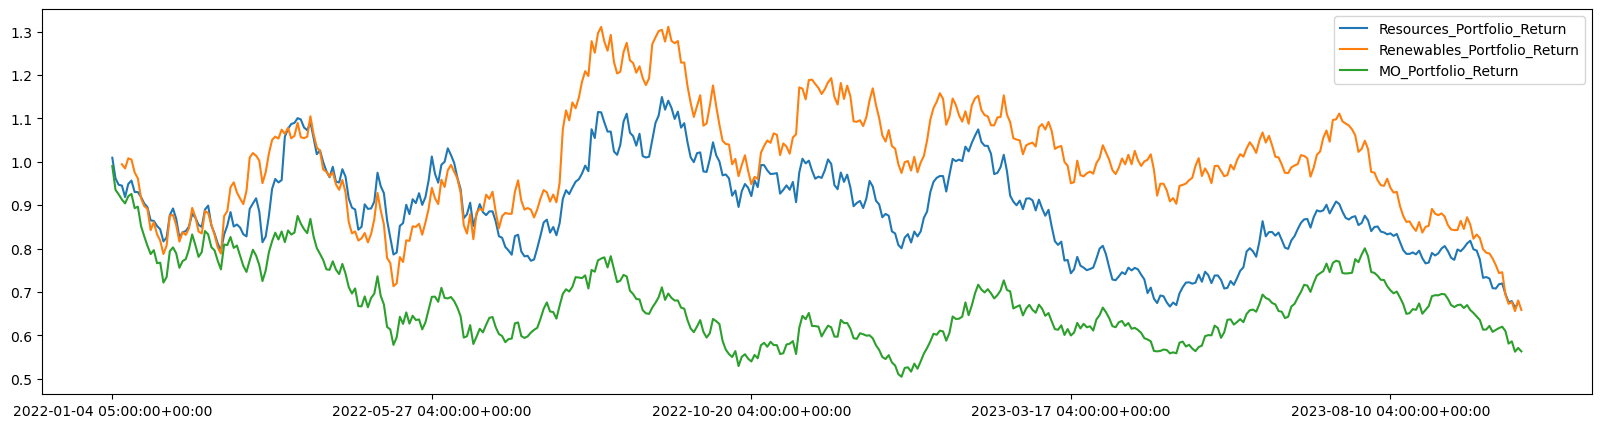

In [20]:
# Combine green portfolio returns dataframes

combined_green_portfolios = pd.concat([df_Resources_DR, df_Renewables_DR, df_Manufacturing_other_DR], axis=1)

# Calculate cumulative returns of all green portfolios

cumulative_returns = (1 + combined_green_portfolios).cumprod()

# Plot cumulative returns for three green portfolios
cumulative_returns.plot(figsize=(20,5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Calculate the standard deviation for all portfolios.
2.  Create a box plot for each portfolio. 
4. Determine which portfolios are riskier than the S&P TSX 500.
5. Calculate the Annualized Standard Deviation.

### Calculate Standard Deviations

In [28]:
# Calculate the daily standard deviations of all green portfolios
green_cumulative_returns_SD = cumulative_returns.std()

green_cumulative_returns_SD

Resources_Portfolio_Return     0.107324
Renewables_Portfolio_Return    0.128084
MO_Portfolio_Return            0.085656
dtype: float64

<Axes: >

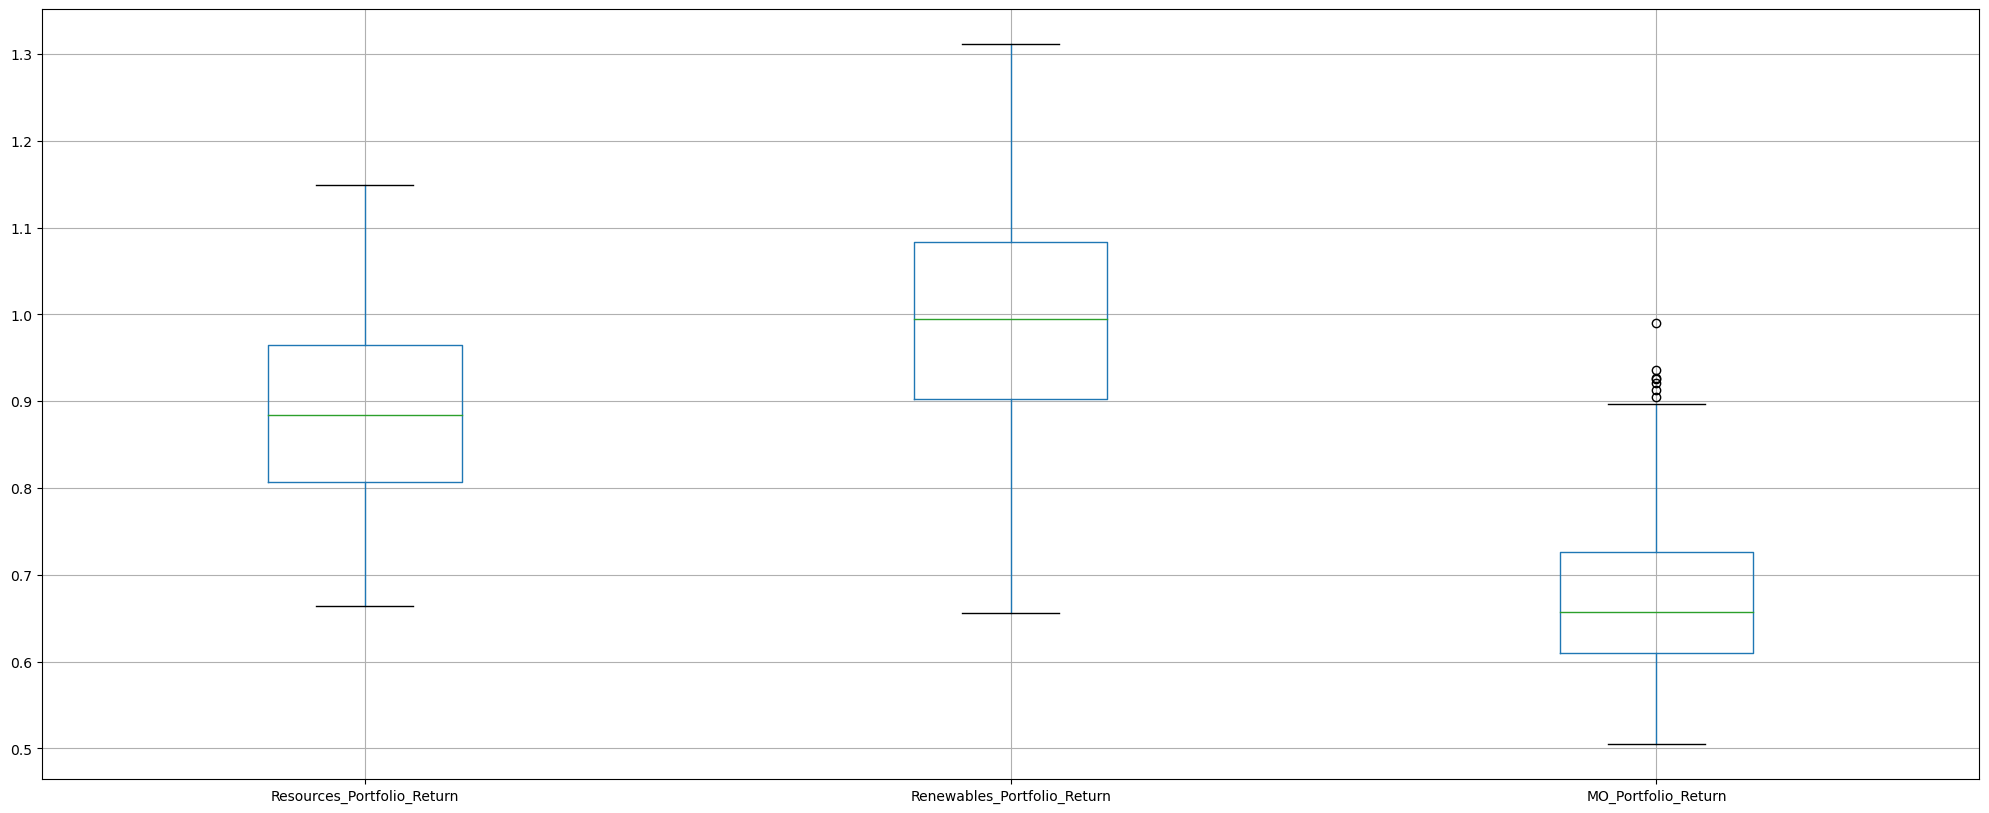

In [29]:
# Box plot to visually show risk of Resources Portfolio
cumulative_returns.boxplot(figsize=(25,10))

### Determine which portfolios are riskier than the S&P 500

In [30]:
# load in CSV for S&P 500 and First Trust NASDAQ Clean Index and remove first row

csv4path=('index_df.csv')

index_df = pd.read_csv(csv4path,index_col="Unnamed: 0",infer_datetime_format=True,parse_dates=True).dropna()

# remove first row
index_df = index_df[1:]

# ensure data types are correct for calculating standard deviation and returns

index_df = index_df.astype({col: float if col != index_df.index.name else col for col in index_df.columns})

# calculate daily returns for S&P 500 and First Trust NASDAQ Clean Index

index_df_DR = index_df.pct_change()

# Calculate the daily standard deviation of S&P 500 and First Trust NASDAQ Clean Index

index_df_SD = index_df_DR.std()

print(index_df_SD)
print(green_cumulative_returns_SD)

QQQ     0.017157
QCLN    0.026469
dtype: float64
Resources_Portfolio_Return     0.107324
Renewables_Portfolio_Return    0.128084
MO_Portfolio_Return            0.085656
dtype: float64


In [213]:
# Determine which portfolios are riskier than the S&P 500 and/or First Trust NASDAQ Clean Index

# All three green portfolios are more risky than that of the S&P 500 and First Trust NASDAQ Clean Index. The Manufacturing and Other Portfolio is least risky out of the three green portfolios. 

### Calculate the Annualized Standard Deviation

In [214]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = index_df_SD * np.sqrt(252)
annualized_std.head()

QQQ     0.272354
QCLN    0.420175
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P 500.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [ ]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate the correlation

# Display de correlation matrix


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [ ]:
# Calculate covariance of a single portfolio

# Calculate variance of S&P 500

# Computing beta

# Plot beta trend


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [33]:
# to create a combined average returns for all data frames
combined_average_returns_portfolios = pd.concat([index_df_DR, combined_green_portfolios], axis=1).dropna()
combined_average_returns_portfolios

,QQQ,QCLN,Resources_Portfolio_Return,Renewables_Portfolio_Return,MO_Portfolio_Return
2022-01-07 05:00:00+00:00,-0.010833,-0.012731,-0.001846,-0.005614,-0.012699
2022-01-10 05:00:00+00:00,0.000658,-0.008806,-0.027873,-0.009566,-0.009900
2022-01-11 05:00:00+00:00,0.015022,0.023481,0.032776,0.023669,0.018334
2022-01-12 05:00:00+00:00,0.003966,0.012091,0.008166,-0.002894,0.005761
2022-01-13 05:00:00+00:00,-0.025016,-0.031092,-0.027614,-0.029495,-0.035392
...,...,...,...,...,...
2023-10-02 04:00:00+00:00,0.008346,-0.029557,-0.033233,-0.068982,-0.016009
2023-10-03 04:00:00+00:00,-0.017550,-0.036500,-0.026964,-0.030891,-0.047521
2023-10-04 04:00:00+00:00,0.013609,0.021074,0.002997,0.006269,0.009005
2023-10-05 04:00:00+00:00,-0.002946,-0.044472,-0.021997,-0.030913,-0.040661


In [ ]:
# Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot




---

In [22]:
# Reading data from 1st stock
from scipy import stats


In [23]:
# Reading data from 2nd stock
scipy.stats.ttest_1samp()

NameError: name 'scipy' is not defined